# init

## imports

In [4]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import warnings

warnings.filterwarnings('ignore')

## configs

In [5]:
PREDICTION_DATA_PATH = os.path.expanduser('~/class/ad_click/data/test.csv')

# load data

In [6]:
pred_df = pd.read_csv(PREDICTION_DATA_PATH)
pred_df.head()

,adgroup_id,userid,time_stamp,pid,nonclk,clk,cms_segid,cms_group_id,pvalue_level,shopping_level,...,cate_clk_count,cat_gender_ad_count,cat_gender_ad_clk_count,cat_age_ad_count,cat_age_ad_clk_count,gender_age_ad_count,gender_age_ad_clk_count,Pred_xg1,Pred_xg2,Pred_xg3
0,102,1122493,1494544665,430539_1007,1,0,0,10,NaN,3,...,120.0,437,17.0,972,49.0,31,1.0,0.425842,0.425445,0.361358
1,102,1030522,1494561308,430539_1007,1,0,82,10,3.0,3,...,128.0,452,18.0,1031,53.0,32,1.0,0.413324,0.557408,0.347493
2,102,686384,1494575099,430539_1007,1,0,0,10,NaN,3,...,132.0,464,18.0,1067,53.0,33,1.0,0.395283,0.429266,0.356536
3,102,769032,1494577595,430548_1007,1,0,80,10,2.0,3,...,134.0,466,18.0,1077,54.0,34,1.0,0.395283,0.314430,0.282013
4,102,83112,1494579892,430539_1007,1,0,80,10,2.0,3,...,134.0,469,18.0,1086,54.0,35,1.0,0.395283,0.471036,0.398434


# evaluation

### auc curve

In [5]:
results_dict = {}
auc_scores = {}
table_data = []

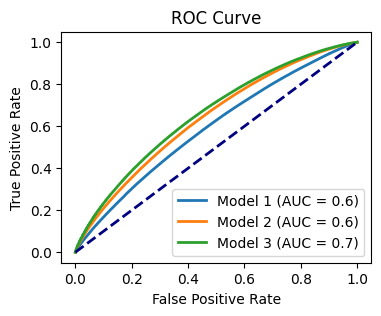

In [6]:
true_labels = pred_df['clk']
xgs = 4

plt.figure(figsize=(4, 3))  # Adjust the figure size if needed

for xg in range(1, xgs):
    key = f'predicted_probabilities_{xg}'
    results_dict[key] = pred_df[f'Pred_xg{xg}']
    auc_score = roc_auc_score(true_labels, results_dict[key])
    auc_scores[xg] = auc_score
    table_data.append([f'Model {xg}', auc_score])
    fpr, tpr, _ = roc_curve(true_labels, results_dict[key])
    plt.plot(fpr, tpr, lw=2, label=f'Model {xg} (AUC = {auc_score:.1f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()